In [1]:
# https://www.kaggle.com/datasets/vizeno/complete-blood-count-cbc-dataset/data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from prettytable import PrettyTable

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

import pickle
import sys

In [3]:
df = pd.read_csv('blood_count_dataset.csv')

In [4]:
df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out


In [5]:
def df_explore(df):
    #Armamos una funcion para tener el detalle de todas las variables
    print( 'Shape: ', df.shape)
    
    t = PrettyTable(['Column', 
                     'Type',
                     'Non-Null',
                     'Nulls',
                     'Nulls %',
                     'Unique',
                     'Example',
                    ])
    
    for c in df.columns:
        t.add_row([c,
                   df[c].dtype,
                   len(df[c])-np.sum(df[c].isna()),
                   np.sum(df[c].isna()),
                   round((np.sum(df[c].isna())/(len(df[c])-np.sum(df[c].isna())))*100,2),
                   np.count_nonzero(df[c].unique()),
                   df[~df[c].isnull()][c].iloc[0],
                  ]) 
    print(t)
    print()
    return

df_explore(df)

Shape:  (4412, 11)
+--------------+---------+----------+-------+---------+--------+---------+
|    Column    |   Type  | Non-Null | Nulls | Nulls % | Unique | Example |
+--------------+---------+----------+-------+---------+--------+---------+
| HAEMATOCRIT  | float64 |   4412   |   0   |   0.0   |  326   |   35.1  |
| HAEMOGLOBINS | float64 |   4412   |   0   |   0.0   |  128   |   11.8  |
| ERYTHROCYTE  | float64 |   4412   |   0   |   0.0   |  433   |   4.65  |
|  LEUCOCYTE   | float64 |   4412   |   0   |   0.0   |  276   |   6.3   |
| THROMBOCYTE  |  int64  |   4412   |   0   |   0.0   |  554   |   310   |
|     MCH      | float64 |   4412   |   0   |   0.0   |  189   |   25.4  |
|     MCHC     | float64 |   4412   |   0   |   0.0   |  105   |   33.6  |
|     MCV      | float64 |   4412   |   0   |   0.0   |  406   |   75.5  |
|     AGE      |  int64  |   4412   |   0   |   0.0   |   95   |    1    |
|     SEX      |  object |   4412   |   0   |   0.0   |   2    |    F    |
|    S

In [6]:
# Converting Sex & Source

gender = {"M":1,"F":0}
df['SEX'] = df['SEX'].map(gender)

origin = {"out":0,"in":1}
df['SOURCE'] = df['SOURCE'].map(origin)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   4412 non-null   float64
 1   HAEMOGLOBINS  4412 non-null   float64
 2   ERYTHROCYTE   4412 non-null   float64
 3   LEUCOCYTE     4412 non-null   float64
 4   THROMBOCYTE   4412 non-null   int64  
 5   MCH           4412 non-null   float64
 6   MCHC          4412 non-null   float64
 7   MCV           4412 non-null   float64
 8   AGE           4412 non-null   int64  
 9   SEX           4412 non-null   int64  
 10  SOURCE        4412 non-null   int64  
dtypes: float64(7), int64(4)
memory usage: 379.3 KB


In [9]:
df.describe().transpose

<bound method DataFrame.transpose of        HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE    LEUCOCYTE  THROMBOCYTE  \
count  4412.000000   4412.000000  4412.000000  4412.000000  4412.000000   
mean     38.197688     12.741727     4.541260     8.718608   257.524479   
std       5.974784      2.079903     0.784091     5.049041   113.972365   
min      13.700000      3.800000     1.480000     1.100000     8.000000   
25%      34.375000     11.400000     4.040000     5.675000   188.000000   
50%      38.600000     12.900000     4.570000     7.600000   256.000000   
75%      42.500000     14.200000     5.050000    10.300000   321.000000   
max      69.000000     18.900000     7.860000    76.600000  1183.000000   

               MCH         MCHC          MCV          AGE          SEX  \
count  4412.000000  4412.000000  4412.000000  4412.000000  4412.000000   
mean     28.234701    33.343042    84.612942    46.626473     0.519039   
std       2.672639     1.228664     6.859101    21.731218     0.4

In [10]:
# Univariable Analysis

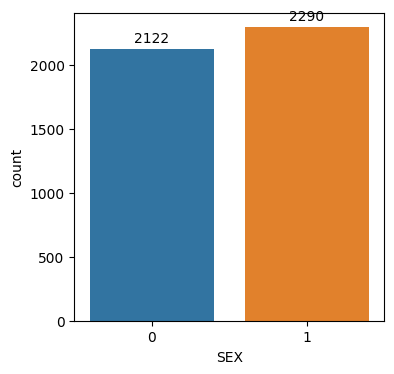

In [11]:
plt.figure(figsize=(4, 4))
ax = sns.countplot(x='SEX', hue='SEX', data=df, legend=False)

for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.show()


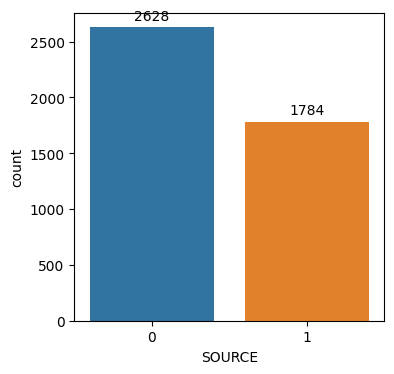

In [12]:
# 0 -> Out Care   1 -> In Care (hospitalization)
plt.figure(figsize=(4, 4))
ax = sns.countplot(x='SOURCE', hue='SOURCE', data=df, legend=False)

for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.show()

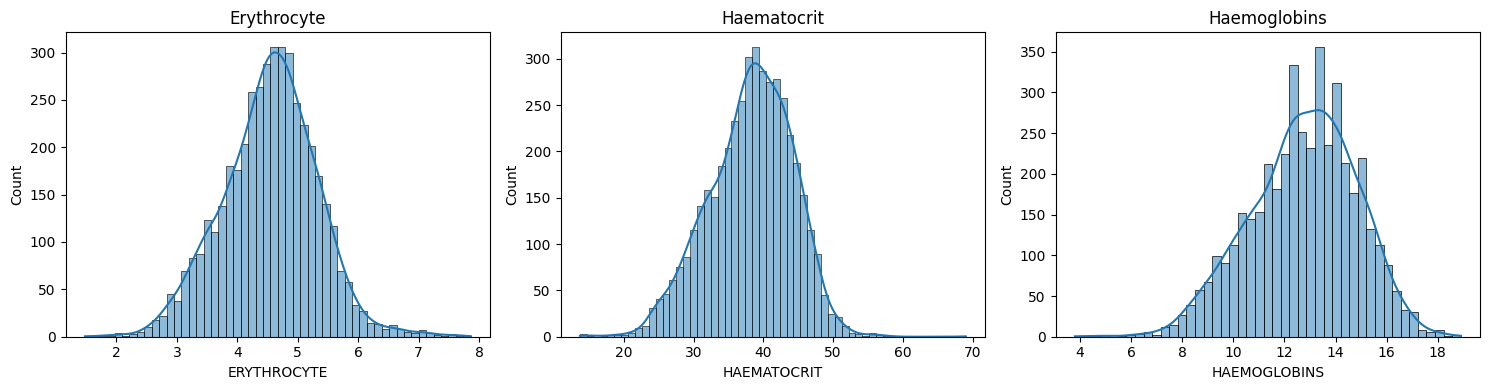

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.histplot(df['ERYTHROCYTE'], kde=True, ax=axes[0])
axes[0].set_title('Erythrocyte')

sns.histplot(df['HAEMATOCRIT'], kde=True, ax=axes[1])
axes[1].set_title('Haematocrit')

sns.histplot(df['HAEMOGLOBINS'], kde=True, ax=axes[2])
axes[2].set_title('Haemoglobins')

plt.tight_layout()
plt.show()

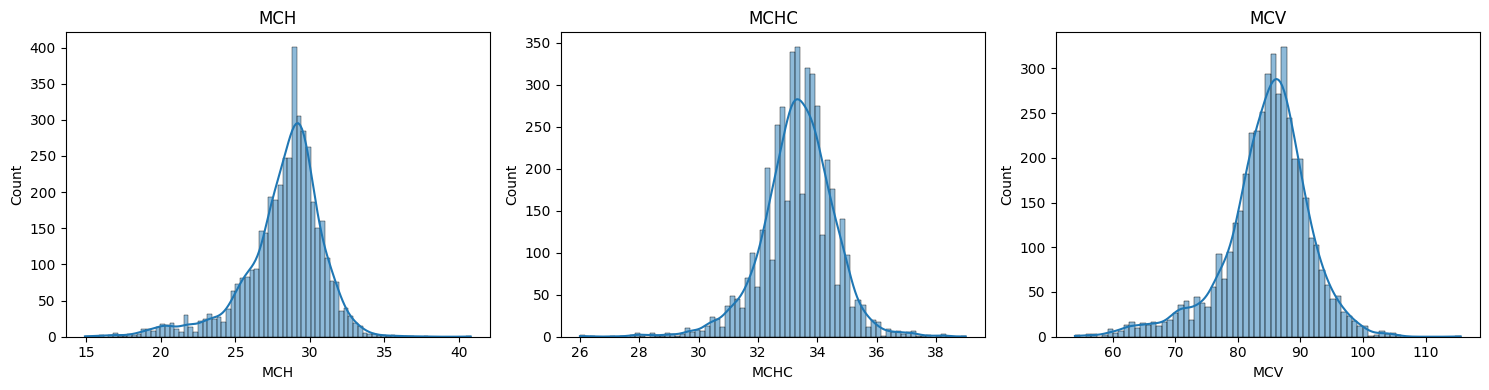

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.histplot(df['MCH'], kde=True, ax=axes[0])
axes[0].set_title('MCH')

sns.histplot(df['MCHC'], kde=True, ax=axes[1])
axes[1].set_title('MCHC')

sns.histplot(df['MCV'], kde=True, ax=axes[2])
axes[2].set_title('MCV')

plt.tight_layout()
plt.show()

<Axes: xlabel='AGE', ylabel='Count'>

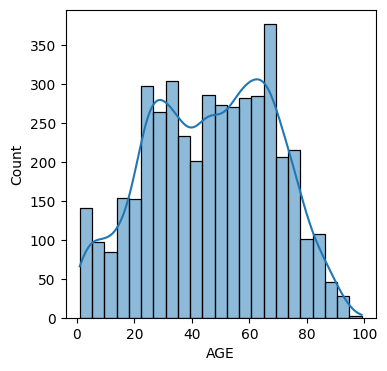

In [15]:
plt.figure(figsize=(4, 4))
sns.histplot(df['AGE'], kde=True)

In [16]:
X = df.iloc[:,0:10]
y = df.iloc[:,10]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.101, random_state=101)

In [18]:
# Decision Tree Classifier

In [19]:
dt_model = DecisionTreeClassifier(random_state=1)

In [20]:
dt_model.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [21]:
dt_predictions = dt_model.predict(X_test)

In [22]:
dt_accuracy = accuracy_score(y_test, dt_predictions)

In [23]:
print(dt_accuracy)

0.6345291479820628


In [24]:
# Random Forest

In [25]:
rf_model = RandomForestClassifier(random_state=1)

In [26]:
rf_model.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:
rf_predictions = rf_model.predict(X_test)

In [28]:
rf_accuracy = accuracy_score(y_test, rf_predictions)

In [29]:
print(rf_accuracy)

0.7174887892376681


In [30]:
# Lineal Regression

In [31]:
lr_model = LogisticRegression(random_state=1)

In [32]:
lr_model.fit(X_train,y_train)

C:\Users\DamianAndresKalemker\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [33]:
# Warnings are not going to be ignored.

In [34]:
lr_predictions = lr_model.predict(X_test)

In [35]:
lr_accuracy = accuracy_score(y_test, lr_predictions)

In [36]:
print(lr_accuracy)

0.7017937219730942


In [37]:
# Confusion Metrix for Decision Tree

print(confusion_matrix(y_test,dt_predictions))

[[181  91]
 [ 72 102]]


In [38]:
# Confusion Metrix for Random Forest

print(confusion_matrix(y_test,rf_predictions))

[[219  53]
 [ 73 101]]


In [39]:
# Confusion Metrix for Linear Regression

print(confusion_matrix(y_test,lr_predictions))

[[224  48]
 [ 85  89]]


In [40]:
print(classification_report(y_test,dt_predictions)) # Classification Report for Decision Tree

              precision    recall  f1-score   support

           0       0.72      0.67      0.69       272
           1       0.53      0.59      0.56       174

    accuracy                           0.63       446
   macro avg       0.62      0.63      0.62       446
weighted avg       0.64      0.63      0.64       446



In [41]:
print(classification_report(y_test,rf_predictions)) # Classification Report for Random Forest

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       272
           1       0.66      0.58      0.62       174

    accuracy                           0.72       446
   macro avg       0.70      0.69      0.70       446
weighted avg       0.71      0.72      0.71       446



In [42]:
print(classification_report(y_test,lr_predictions)) # Classification Report for Linear Regression

              precision    recall  f1-score   support

           0       0.72      0.82      0.77       272
           1       0.65      0.51      0.57       174

    accuracy                           0.70       446
   macro avg       0.69      0.67      0.67       446
weighted avg       0.70      0.70      0.69       446



In [43]:
pickle_filename = 'random_forest_model.pkl'
with open(pickle_filename,'wb') as file:
    pickle.dump(rf_model,file)
print("Model saved as: ", pickle_filename)    

Model saved as:  random_forest_model.pkl


In [44]:
def predict_patient(model, features: dict):

    df = pd.DataFrame([features])
    prediction = model.predict(df)[0]
    probability = model.predict_proba(df)[0]
    return prediction, probability

In [45]:
features = {
    "HAEMATOCRIT": 42.5,
    "HAEMOGLOBINS": 14.2,
    "ERYTHROCYTE": 4.8,
    "LEUCOCYTE": 6.1,
    "THROMBOCYTE": 250,
    "MCH": 29.6,
    "MCHC": 33.1,
    "MCV": 89,
    "AGE": 45,
    "SEX": 1  # 1 = Male, 0 = Female
}

prediction, probability = predict_patient(rf_model, features)

print("Prediction:", prediction)
print(f"In Care Probability: {probability[1]*100:.2f}%")
print(f"Out Care Probability: {probability[0]*100:.2f}%")


Prediction: 0
In Care Probability: 18.00%
Out Care Probability: 82.00%
